## Calculating the Return of Indices

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['^DJI', '^GSPC', '^IXIC']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [4]:
ind_data.head()

,^DJI,^GSPC,^IXIC
Date,,,
1999-12-31,11497.120117,1469.250000,4069.310059
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883


In [5]:
ind_data.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-05-17,34327.789062,4163.290039,13379.049805
2021-05-18,34060.660156,4127.830078,13303.639648
2021-05-19,33896.039062,4115.680176,13299.740234
2021-05-20,34084.148438,4159.120117,13535.740234
2021-05-21,34207.839844,4155.859863,13470.990234


Normalize the data to 100 and plot the results on a graph. 

<function matplotlib.pyplot.show(close=None, block=None)>

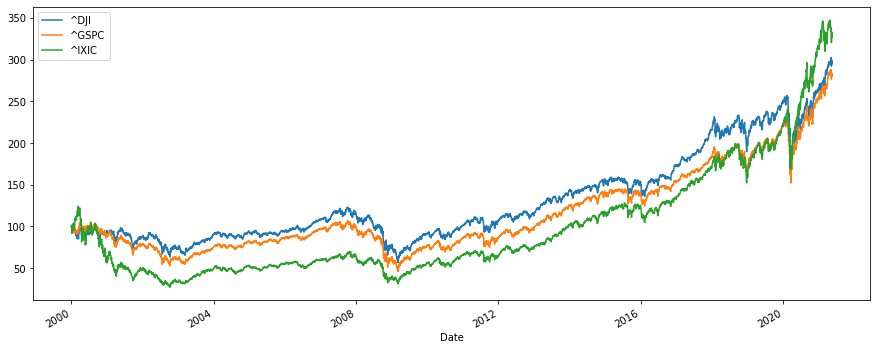

In [6]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

How would you explain the common and the different parts of the behavior of the three indices?

***** Working backwards. Similarities occur in the timeline for COVID-19 impact in early 2020, GFC in 2008/2009. Differences lie in the performance of the different constituents that make up the different indices. NASDAQ covers mostly US Tech stocks, and they have done better in the response to COVID-19. Dow Jones only covers 30 US stocks, so isn;t really a great representation of diversification in a portfolio to represent the entire US market, thogh has done better than the S&P 500, which is exposed to more of the US markets, hence is impacted by the poorer performing stocks mor than the other two indices.

Obtain the simple returns of the indices.

In [7]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-05-17,-0.001580,-0.002530,-0.003792
2021-05-18,-0.007782,-0.008517,-0.005636
2021-05-19,-0.004833,-0.002943,-0.000293
2021-05-20,0.005550,0.010555,0.017745
2021-05-21,0.003629,-0.000784,-0.004784


Estimate the average annual return of each index.

In [8]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^DJI     0.068697
^GSPC    0.067820
^IXIC    0.087507
dtype: float64